In [10]:
import tensorflow as tf
#from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
# from tqdm.notebook import tqdm
import random
# import warnings
# warnings.filterwarnings("ignore")

In [11]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY_cat = tf.keras.utils.to_categorical(trainY)
testY_cat = tf.keras.utils.to_categorical(testY)

In [12]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

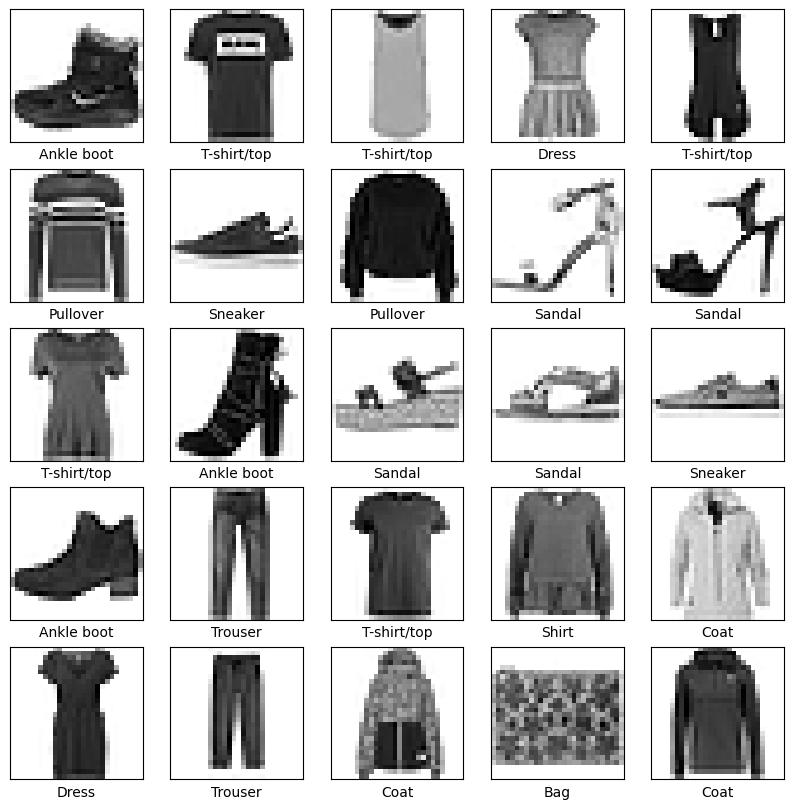

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()

In [6]:
model = tf.keras.models.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', name='conv-layer-1'),
    
    # First pooling layer
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-1'),
    
    # Second convolutional layer
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='conv-layer-2'),
    
    # Second pooling layer
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-2'),
    
    # Global average pooling
    tf.keras.layers.GlobalAveragePooling2D(name='pooling-layer-3'),
    
    # Fully connected layer with softmax activation for multi-class classification
    tf.keras.layers.Dense(len(class_names), activation="softmax", name="output-layer")
])

C:\Users\Harsh Patil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss="categorical_crossentropy",
optimizer="adam",
metrics=["accuracy"])

In [8]:
history = model.fit(train_norm, trainY_cat, epochs=10, validation_data=(test_norm, testY_cat))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4695 - loss: 1.4563 - val_accuracy: 0.7070 - val_loss: 0.8481
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7233 - loss: 0.7912 - val_accuracy: 0.7351 - val_loss: 0.7410
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7427 - loss: 0.7243 - val_accuracy: 0.7574 - val_loss: 0.7072
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7552 - loss: 0.6803 - val_accuracy: 0.7620 - val_loss: 0.6583
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7734 - loss: 0.6427 - val_accuracy: 0.7676 - val_loss: 0.6449
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7818 - loss: 0.6159 - val_accuracy: 0.7835 - val_loss: 0.6138
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7951 - loss: 0.5830 - val_accuracy: 0.7896 - val_loss: 0.5982
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8067 -

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv-layer-1 (Conv2D)                │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling-layer-1 (AveragePooling2D)   │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv-layer-2 (Conv2D)                │ (None, 13, 13, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling-layer-2 (AveragePooling2D)   │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling-layer-3                      │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output-layer (Dense)                 │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,304 (227.75 KB)

 Trainable params: 19,434 (75.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,870 (151.84 KB)

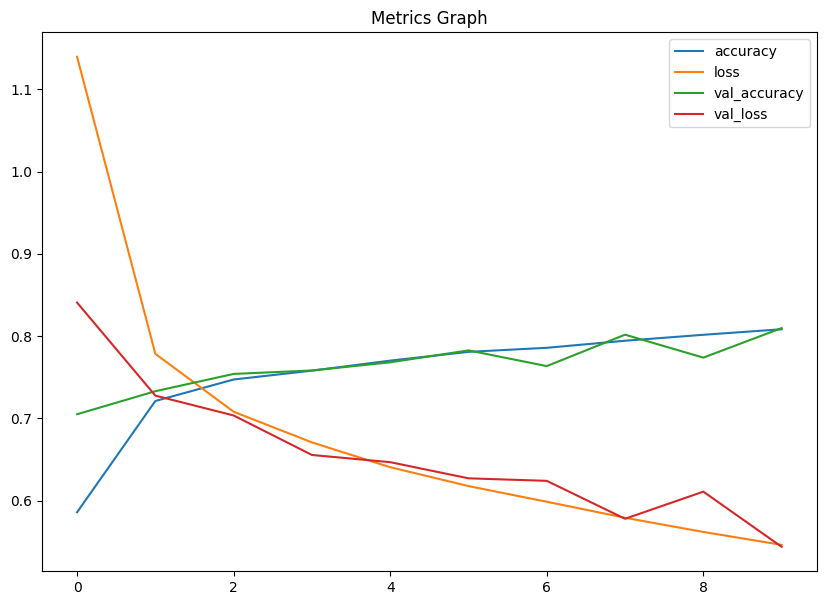

In [10]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

In [11]:
model.evaluate(testX, testY_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6941 - loss: 90.9132


[94.96794128417969, 0.695900022983551]

In [12]:
predictions = model.predict(testX)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [13]:
predictions = tf.argmax(predictions, axis=1)

In [14]:
y_test = tf.argmax(testY_cat, axis=1)

In [15]:
# y_test = tf.Variable(y_test)

In [16]:
print(metrics.accuracy_score(y_test, predictions))

0.6959


In [17]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57      1000
           1       0.79      0.97      0.87      1000
           2       0.68      0.65      0.66      1000
           3       0.47      0.78      0.59      1000
           4       0.53      0.71      0.61      1000
           5       0.74      0.92      0.82      1000
           6       0.57      0.05      0.09      1000
           7       0.97      0.52      0.68      1000
           8       0.88      0.91      0.89      1000
           9       0.81      0.95      0.88      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.67     10000
weighted avg       0.71      0.70      0.67     10000



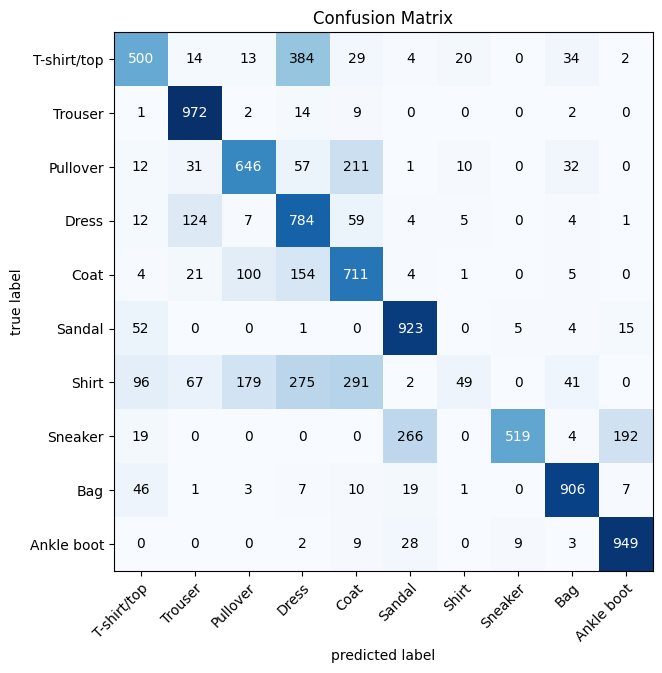

In [18]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, figsize=(10,7), class_names=class_names)
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


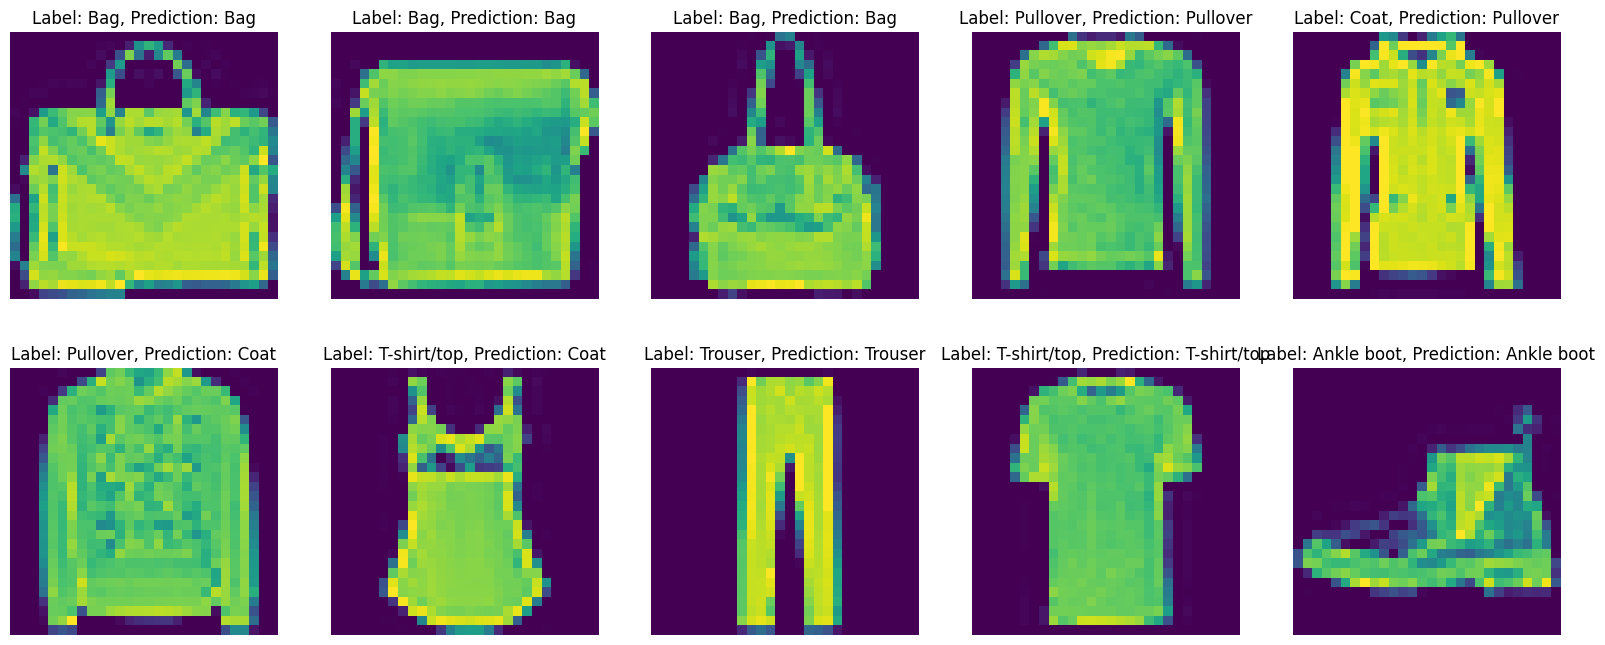

In [19]:
images = []
labels = []
random_indices = random.sample(range(len(testX)), 10)
for idx in random_indices:
    images.append(testX[idx])
    labels.append(testY_cat[idx])
    
images = np.array(images)
labels = np.array(labels)
fig = plt.figure(figsize=(20, 8))
rows = 2
cols = 5
x = 1


for image, label in zip(images, labels):
    fig.add_subplot(rows, cols, x)
    prediction = model.predict(tf.expand_dims(image, axis=0))
    prediction = class_names[tf.argmax(prediction.flatten())]
    label = class_names[tf.argmax(label)]
    plt.title(f"Label: {label}, Prediction: {prediction}")
    plt.imshow(image/255.)
    plt.axis("off")
    x += 1